# Ireland county boundaries

In [1]:
import os
from datetime import datetime, timezone
from zipfile import ZipFile
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pooch
from matplotlib import ticker
import climag.climag as cplt

In [2]:
# base data download directory
DATA_DIR = os.path.join("data", "boundaries")

In [3]:
GPKG_BOUNDARY = os.path.join(DATA_DIR, "boundaries_all.gpkg")

##  Counties - OSi National Statutory Boundaries - 2019

<https://data-osi.opendata.arcgis.com/datasets/osi::counties-osi-national-statutory-boundaries-2019/about>

In [4]:
SUB_DIR = os.path.join(DATA_DIR, "OSi")
os.makedirs(SUB_DIR, exist_ok=True)
URL = (
    "https://opendata.arcgis.com/api/v3/datasets/"
    "e6f6418eb62442c4adbe18d0a64135a2_0/downloads/data?"
    "format=shp&spatialRefId=2157&where=1%3D1"
)
KNOWN_HASH = None
FILE_NAME = "counties-osi-national-statutory-boundaries-2019.zip"

In [7]:
# download data if necessary
if not os.path.isfile(os.path.join(SUB_DIR, FILE_NAME)):
    pooch.retrieve(
        url=URL, known_hash=KNOWN_HASH, fname=FILE_NAME, path=SUB_DIR
    )

    with open(
        os.path.join(SUB_DIR, f"{FILE_NAME[:-4]}.txt"), "w", encoding="utf-8"
    ) as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: 7e382ae52ba37a35136d8c8bdeac899b59bdc6525e650314b008938717f73fa4
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [5]:
ZIP_FILE = os.path.join(
    SUB_DIR, "counties-osi-national-statutory-boundaries-2019.zip"
)

In [9]:
# list of files/folders in the ZIP archive
ZipFile(ZIP_FILE).namelist()

['Counties___OSi_National_Statutory_Boundaries_.shp',
 'Counties___OSi_National_Statutory_Boundaries_.shx',
 'Counties___OSi_National_Statutory_Boundaries_.dbf',
 'Counties___OSi_National_Statutory_Boundaries_.cpg',
 'Counties___OSi_National_Statutory_Boundaries_.prj',
 'Counties_-_OSi_National_Statutory_Boundaries_-_2019.xml']

In [6]:
osi = gpd.read_file(
    f"zip://{ZIP_FILE}!Counties___OSi_National_Statutory_Boundaries_.shp"
)

In [11]:
osi

,OBJECTID,CO_ID,ENGLISH,GAEILGE,LOGAINM_ID,GUID,CONTAE,COUNTY,PROVINCE,CENTROID_X,CENTROID_Y,AREA,SHAPE_Leng,SHAPE_Area,geometry
0,1,50000,DONEGAL,Dún na nGall,100013,2ae19629-1452-13a3-e055-000000000001,Dún na nGall,DONEGAL,Ulster,607296.31,911848.45,4.860754e+09,1.859119e+06,4.860754e+09,"MULTIPOLYGON (((594809.032 934698.617, 594809...."
1,2,120000,LIMERICK,Luimneach,100022,2ae19629-1440-13a3-e055-000000000001,Luimneach,LIMERICK,Munster,548318.75,640943.05,2.754926e+09,3.897987e+05,2.754926e+09,"POLYGON ((565662.328 665775.167, 565663.255 66..."
2,3,80000,KILDARE,Cill Dara,100007,2ae19629-1455-13a3-e055-000000000001,Cill Dara,KILDARE,Leinster,678993.60,712090.40,1.694083e+09,2.970485e+05,1.694083e+09,"POLYGON ((700193.727 734740.683, 700202.676 73..."
3,4,220000,WATERFORD,Port Láirge,100026,2ae19629-144b-13a3-e055-000000000001,Port Láirge,WATERFORD,Munster,630336.80,599955.37,1.857038e+09,4.572206e+05,1.857038e+09,"MULTIPOLYGON (((627774.638 593971.494, 627777...."
4,5,260000,DUBLIN,Baile Átha Cliath,100002,2ae19629-144f-13a3-e055-000000000001,Baile Átha Cliath,DUBLIN,Leinster,714929.28,740960.44,9.257609e+08,3.661986e+05,9.257609e+08,"MULTIPOLYGON (((703019.336 739044.540, 703020...."
5,6,230000,WESTMEATH,An Iarmhí,100016,2ae19629-144c-13a3-e055-000000000001,An Iarmhí,WESTMEATH,Leinster,635445.42,756679.97,1.838310e+09,2.916598e+05,1.838310e+09,"POLYGON ((641367.591 732152.211, 641366.980 73..."
6,7,170000,MONAGHAN,Muineachán,100025,2ae19629-1445-13a3-e055-000000000001,Muineachán,MONAGHAN,Ulster,669110.41,824170.57,1.294164e+09,3.009820e+05,1.294164e+09,"POLYGON ((675935.046 835570.097, 675941.324 83..."
7,8,250000,WICKLOW,Cill Mhantáin,100008,2ae19629-144e-13a3-e055-000000000001,Cill Mhantáin,WICKLOW,Leinster,707784.79,690738.10,2.025161e+09,3.206300e+05,2.025161e+09,"MULTIPOLYGON (((725064.152 671911.669, 725060...."
8,9,40000,CORK,Corcaigh,100010,2ae19629-1451-13a3-e055-000000000001,Corcaigh,CORK,Munster,527532.69,573117.78,7.502635e+09,1.962542e+06,7.502635e+09,"MULTIPOLYGON (((539837.098 620406.502, 539820...."
9,10,70000,KERRY,Ciarraí,100005,2ae19629-1454-13a3-e055-000000000001,Ciarraí,KERRY,Munster,469696.21,600519.77,4.812989e+09,1.521123e+06,4.812989e+09,"MULTIPOLYGON (((444169.720 600758.236, 444174...."


In [12]:
osi.crs

<Derived Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

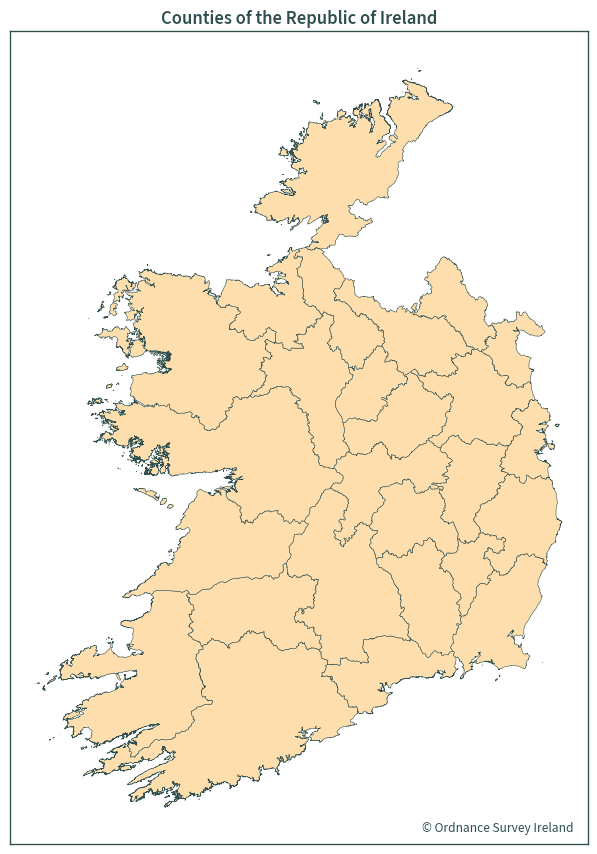

In [7]:
base = osi.plot(
    color="navajowhite",
    figsize=(9, 9),
    edgecolor="darkslategrey",
    linewidth=0.4,
)

plt.tick_params(labelbottom=False, labelleft=False)
plt.title("Counties of the Republic of Ireland")
plt.text(650000, 505000, "© Ordnance Survey Ireland")

plt.tight_layout()
plt.show()

## OSNI Open Data - Largescale Boundaries - County Boundaries

<https://www.opendatani.gov.uk/dataset/osni-open-data-largescale-boundaries-county-boundaries1>

In [7]:
SUB_DIR = os.path.join(DATA_DIR, "OSNI")
os.makedirs(SUB_DIR, exist_ok=True)
URL = (
    "https://osni-spatialni.opendata.arcgis.com/datasets/"
    "spatialni::osni-open-data-largescale-boundaries-county-boundaries-.zip?"
    'outSR={"latestWkid":29902,"wkid":29900}'
)
KNOWN_HASH = None
FILE_NAME = "osni-open-data-largescale-boundaries-county-boundaries.zip"

In [21]:
# download data if necessary
if not os.path.isfile(os.path.join(SUB_DIR, FILE_NAME)):
    pooch.retrieve(
        url=URL, known_hash=KNOWN_HASH, fname=FILE_NAME, path=SUB_DIR
    )

    with open(
        os.path.join(SUB_DIR, f"{FILE_NAME[:-4]}.txt"), "w", encoding="utf-8"
    ) as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: 41ddbfdeac4e86d8cc3d17ad3d3b2db8dcd523219bc9119a12065452230bd002
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [8]:
ZIP_FILE = os.path.join(SUB_DIR, FILE_NAME)

In [23]:
# list of files/folders in the ZIP archive
ZipFile(ZIP_FILE).namelist()

['OSNI_Open_Data_-_Largescale_Boundaries_-_County_Boundaries_.shp',
 'OSNI_Open_Data_-_Largescale_Boundaries_-_County_Boundaries_.shx',
 'OSNI_Open_Data_-_Largescale_Boundaries_-_County_Boundaries_.dbf',
 'OSNI_Open_Data_-_Largescale_Boundaries_-_County_Boundaries_.cpg',
 'OSNI_Open_Data_-_Largescale_Boundaries_-_County_Boundaries_.prj',
 'OSNI_Open_Data_-_Largescale_Boundaries_-_County_Boundaries_.xml']

In [9]:
osni = gpd.read_file(
    f"zip://{ZIP_FILE}!OSNI_Open_Data_-_Largescale_Boundaries_-_"
    "County_Boundaries_.shp"
)

In [25]:
osni

,COUNTY_ID,CountyName,Area_SqKM,OBJECTID,geometry
0,6,TYRONE,3265.796622,1,"POLYGON ((239669.119 410673.911, 239674.087 41..."
1,1,ANTRIM,3097.847750,2,"MULTIPOLYGON (((332496.979 369026.840, 332495...."
2,2,ARMAGH,1327.228438,3,"POLYGON ((306664.851 363565.186, 306800.000 36..."
3,4,FERMANAGH,1850.832538,4,"POLYGON ((219812.322 373029.105, 219829.775 37..."
4,5,LONDONDERRY,2118.316853,5,"POLYGON ((284790.378 439909.102, 284790.998 43..."
5,3,DOWN,2491.238606,6,"MULTIPOLYGON (((325844.559 312608.723, 325840...."


In [26]:
osni.crs

<Derived Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [10]:
# rename Londonderry to Derry
osni.replace("LONDONDERRY", "DERRY", inplace=True)

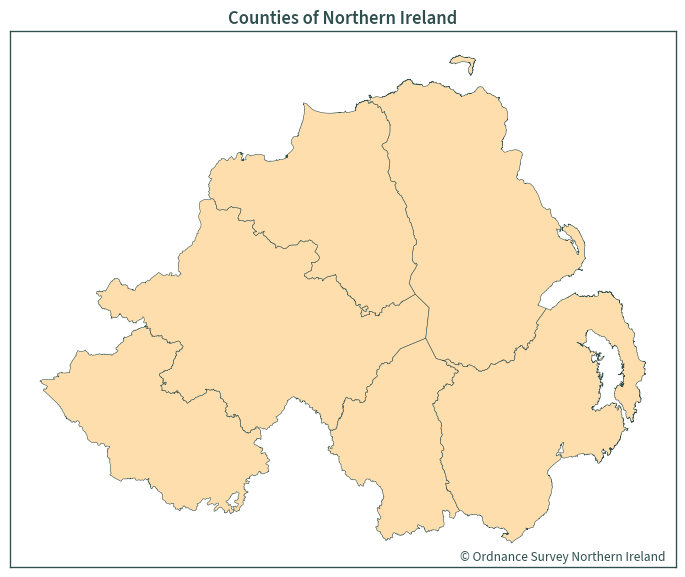

In [12]:
base = osni.plot(
    color="navajowhite",
    figsize=(7.5, 7.5),
    edgecolor="darkslategrey",
    linewidth=0.4,
)

plt.tick_params(labelbottom=False, labelleft=False)
plt.title("Counties of Northern Ireland")
plt.text(312000, 305000, "© Ordnance Survey Northern Ireland")

plt.tight_layout()
plt.show()

## County boundaries - Island of Ireland

In [11]:
osi_counties = osi[["CONTAE", "COUNTY", "PROVINCE", "geometry"]]

In [47]:
osi_counties

,CONTAE,COUNTY,PROVINCE,geometry
0,Dún na nGall,DONEGAL,Ulster,"MULTIPOLYGON (((594809.032 934698.617, 594809...."
1,Luimneach,LIMERICK,Munster,"POLYGON ((565662.328 665775.167, 565663.255 66..."
2,Cill Dara,KILDARE,Leinster,"POLYGON ((700193.727 734740.683, 700202.676 73..."
3,Port Láirge,WATERFORD,Munster,"MULTIPOLYGON (((627774.638 593971.494, 627777...."
4,Baile Átha Cliath,DUBLIN,Leinster,"MULTIPOLYGON (((703019.336 739044.540, 703020...."
5,An Iarmhí,WESTMEATH,Leinster,"POLYGON ((641367.591 732152.211, 641366.980 73..."
6,Muineachán,MONAGHAN,Ulster,"POLYGON ((675935.046 835570.097, 675941.324 83..."
7,Cill Mhantáin,WICKLOW,Leinster,"MULTIPOLYGON (((725064.152 671911.669, 725060...."
8,Corcaigh,CORK,Munster,"MULTIPOLYGON (((539837.098 620406.502, 539820...."
9,Ciarraí,KERRY,Munster,"MULTIPOLYGON (((444169.720 600758.236, 444174...."


In [12]:
osni_counties = osni.rename(columns={"CountyName": "COUNTY"})

In [13]:
osni_counties = osni_counties[["geometry", "COUNTY"]]

In [14]:
# https://en.wikipedia.org/wiki/Counties_of_Ireland
contae = {
    "ANTRIM": "Aontroim",
    "ARMAGH": "Ard Mhacha",
    "DOWN": "An Dún",
    "FERMANAGH": "Fear Manach",
    "DERRY": "Doire",
    "TYRONE": "Tír Eoghain",
}

In [15]:
osni_counties["CONTAE"] = osni_counties["COUNTY"].map(contae)

In [16]:
osni_counties["PROVINCE"] = "Ulster"

In [53]:
osni_counties

,geometry,COUNTY,CONTAE,PROVINCE
0,"POLYGON ((239669.119 410673.911, 239674.087 41...",TYRONE,Tír Eoghain,Ulster
1,"MULTIPOLYGON (((332496.979 369026.840, 332495....",ANTRIM,Aontroim,Ulster
2,"POLYGON ((306664.851 363565.186, 306800.000 36...",ARMAGH,Ard Mhacha,Ulster
3,"POLYGON ((219812.322 373029.105, 219829.775 37...",FERMANAGH,Fear Manach,Ulster
4,"POLYGON ((284790.378 439909.102, 284790.998 43...",DERRY,Doire,Ulster
5,"MULTIPOLYGON (((325844.559 312608.723, 325840....",DOWN,An Dún,Ulster


In [17]:
# reproject to Irish Transverse Mercator
osi_counties = osi_counties.to_crs(cplt.ITM_EPSG)

In [18]:
osni_counties = osni_counties.to_crs(cplt.ITM_EPSG)

In [19]:
# remove overlapping areas in OSi layer
osi_counties = osi_counties.overlay(osni_counties, how="difference")

In [20]:
# merge county layers
ie_counties = osi_counties.merge(osni_counties, how="outer")

In [21]:
ie_counties

,CONTAE,COUNTY,PROVINCE,geometry
0,Dún na nGall,DONEGAL,Ulster,"MULTIPOLYGON (((668515.913 943718.890, 668514...."
1,Luimneach,LIMERICK,Munster,"POLYGON ((565662.328 665775.167, 565663.255 66..."
2,Cill Dara,KILDARE,Leinster,"POLYGON ((700193.727 734740.683, 700202.676 73..."
3,Port Láirge,WATERFORD,Munster,"MULTIPOLYGON (((627774.638 593971.494, 627777...."
4,Baile Átha Cliath,DUBLIN,Leinster,"MULTIPOLYGON (((730410.012 750574.906, 730401...."
5,An Iarmhí,WESTMEATH,Leinster,"POLYGON ((641367.591 732152.211, 641366.980 73..."
6,Muineachán,MONAGHAN,Ulster,"MULTIPOLYGON (((675985.454 835478.726, 676014...."
7,Cill Mhantáin,WICKLOW,Leinster,"MULTIPOLYGON (((725064.152 671911.669, 725060...."
8,Corcaigh,CORK,Munster,"MULTIPOLYGON (((539837.098 620406.502, 539820...."
9,Ciarraí,KERRY,Munster,"MULTIPOLYGON (((444169.720 600758.236, 444174...."


In [22]:
# new colour map
# https://stackoverflow.com/a/31052741
# sample the colormaps that you want to use. Use 20 from each so we get 40
# colors in total
colors1 = plt.cm.tab20b(np.linspace(0.0, 1, 20))
colors2 = plt.cm.tab20c(np.linspace(0, 1, 20))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))

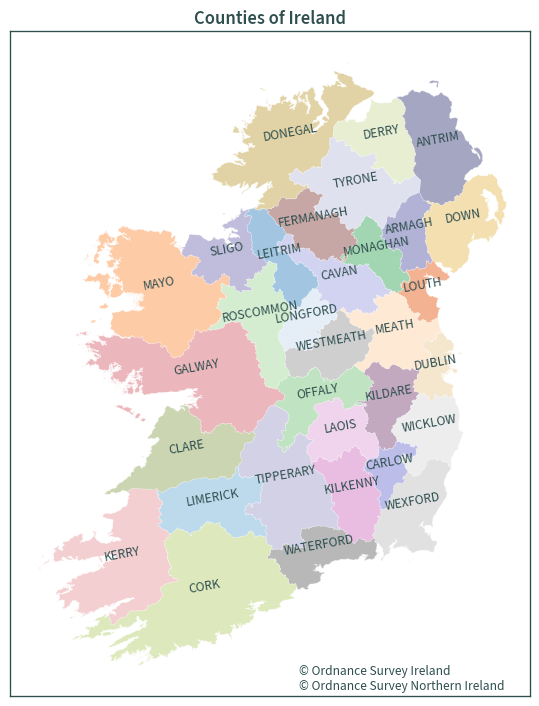

In [23]:
# categorical map - labels directly on plot
base = ie_counties.plot(
    cmap=mcolors.ListedColormap(colors),
    edgecolor="white",
    linewidth=0.4,
    figsize=(9, 9),
    column="COUNTY",
    alpha=0.45,
)

map_labels = zip(
    zip(ie_counties.centroid.x, ie_counties.centroid.y), ie_counties["COUNTY"]
)
for xy, lab in map_labels:
    base.annotate(text=lab, xy=xy, textcoords="data", rotation=10, ha="center")

plt.tick_params(labelbottom=False, labelleft=False)
plt.title("Counties of Ireland")
plt.text(
    612500,
    502500,
    "© Ordnance Survey Ireland\n© Ordnance Survey Northern Ireland",
)

plt.show()

In [62]:
ie_counties.crs

<Derived Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [24]:
ie_counties.to_file(GPKG_BOUNDARY, layer="OSi_OSNI_IE_Counties_2157")